In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
cd ../../utils/

C:\Users\fjdur\Documents\utils


In [3]:
import utils_guided_retraining as utils

2.5.0
keras
2.5.0


In [4]:
from importlib import reload  
utils = reload(utils)

2.5.0
keras
2.5.0


In [5]:
dataset = 'gtsrb'

In [6]:
x_train,y_train = utils.get_data(dataset,"Train")
x_val,y_val = utils.get_data(dataset,"Val")
x_test,y_test = utils.get_data(dataset,"Test")

In [7]:
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/MNIST project/models2"

    
model = utils.My_model(dataset,True, model_dir)

Model loaded correctly


In [8]:
model.evaluate(x_test,y_test)

123/123 [==============================] - 53s 72ms/step - loss: 0.0293 - accuracy: 0.9929


[0.029302377253770828, 0.9928625822067261]

In [10]:
y_test_labels = np.argmax(y_test,axis=1)
print(y_test_labels[-10:])

[42 42 42 42 42 42 42 42 42 42]


In [11]:
y_train_labels = np.argmax(y_train,axis=1)
print(y_train_labels[:10])

[0 0 0 0 0 0 0 0 0 0]


In [12]:
x_train.shape[1:3]

(48, 48)

In [13]:
img_width,img_height  = model.sizes
print(img_width,img_height)

48 48


In [14]:
loading_cw = True
loading_bim = True
loading_fgsm = True

In [15]:
n_advs = 3921

In [16]:
see_images = False

## Adversarial methods

In [17]:
def see_x_image(x,y):
    '''# (48,48,1) show image, y - (43,)
    '''
    plt.figure()
    
    plt.imshow((x.reshape((img_width,img_height))*255).astype("uint8"))
    plt.title(str(np.argmax(y)))
    plt.axis("off")


In [18]:
import foolbox as fb
import keras.backend as K

In [19]:
epsilons =[0.01,0.1]
epsilons =[0.05]

In [20]:
#pip install foolbox --upgrade

In [21]:
from keras.utils import np_utils

### Creating adversarial set from training set

In [23]:
fmodel = fb.TensorFlowModel(model.model,bounds=(0,1))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [24]:

n_each_atack = int(n_advs/3)
print(n_each_atack)

1307


In [25]:
# Create n random numbers to get inputs from a set
n = n_advs
different_idxs_train = np.random.choice(len(x_train), n, replace=False)
print(len(different_idxs_train))
print(different_idxs_train[:10])

3921
[ 6532 15503   854 20552 13793 10145 17130  3710 29581 12658]


In [26]:
# Create n random numbers to get inputs from a set
n = n_advs
different_idxs_test = np.random.choice(len(x_test), n, replace=False)
print(len(different_idxs_test))
print(different_idxs_test[:10])

3921
[ 236  470 2352 3914 3500 1991   60 3805 2703 3213]


In [27]:
type(different_idxs_train)

numpy.ndarray

In [28]:
idxs_cw_train = different_idxs_train[:n_each_atack]
idxs_bim_train = different_idxs_train[n_each_atack:2*n_each_atack]
idxs_fgsm_train = different_idxs_train[2*n_each_atack:]
print(len(idxs_cw_train))
print(len(idxs_bim_train))
print(len(idxs_fgsm_train))

1307
1307
1307


In [29]:
idxs_cw_test = different_idxs_test[:n_each_atack]
idxs_bim_test = different_idxs_test[n_each_atack:2*n_each_atack]
idxs_fgsm_test = different_idxs_test[2*n_each_atack:]
print(len(idxs_cw_test))
print(len(idxs_bim_test))
print(len(idxs_fgsm_test))

1307
1307
1307


In [30]:
print(idxs_cw_train[:10])
print(idxs_cw_test[:10])

[ 6532 15503   854 20552 13793 10145 17130  3710 29581 12658]
[ 236  470 2352 3914 3500 1991   60 3805 2703 3213]


In [29]:
#loading = True

In [30]:
if (loading_cw):
    print("Loading...")
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_cw_train.npy"
    idxs_cw_train = np.load(save_dir)
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_bim_train.npy"
    idxs_bim_train = np.load(save_dir)
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_fgsm_train.npy"
    idxs_fgsm_train = np.load(save_dir)
    print("Finished")
    

In [32]:
if (loading_cw):
    print("Loading...")
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_cw_test.npy"
    idxs_cw_test = np.load(save_dir)
    print(idxs_cw_test.shape)
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_bim_test.npy"
    idxs_bim_test = np.load(save_dir)
    print(idxs_bim_test.shape)
    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_fgsm_test.npy"
    idxs_fgsm_test = np.load(save_dir)
    print(idxs_fgsm_test.shape)
    print("Finished")
    

Loading...
(1307,)
(1307,)
(1307,)
Finished


In [32]:
idxs_cw_train[:10]

array([31298, 27344, 27822, 17135, 19399, 25630, 12187,   839, 18580,
         311])

In [33]:
if (not loading_cw):
    #print("saving")
    #save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_advs.npy"

    #with open(save_dir, 'wb') as f:
    #    np.save(f, different_idxs)

    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_cw_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_cw_train)

    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_bim_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_bim_train)

    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_fgsm_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_fgsm_train)

In [34]:
if (not loading_cw):
    #print("saving")
    #save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_advs.npy"

    #with open(save_dir, 'wb') as f:
    #    np.save(f, different_idxs)

    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_cw_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_cw_test)

    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_bim_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_bim_test)

    save_dir = "D:/data_adversarial_july/"+dataset+"/idxs_fgsm_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, idxs_fgsm_test)

In [35]:
def get_from_original_set_adv(idx_list,x_set,y_set_labels):
    new_images = np.zeros((len(idx_list),img_width,img_height,1))
    new_labels = np.zeros((len(idx_list),))
    j=0
    for idx in idx_list:
        print(idx)
        print("---",j)
        new_images[j] = x_set[int(idx)]
        new_labels[j] = y_set_labels[int(idx)]
        print("label",new_labels[j])
        j +=1
    return new_images , new_labels

In [36]:
images_to_adv_train,labels_to_adv_train  = get_from_original_set_adv(idxs_cw_train,x_train,y_train_labels)

31298
--- 0
label 42.0
27344
--- 1
label 34.0
27822
--- 2
label 35.0
17135
--- 3
label 13.0
19399
--- 4
label 17.0
25630
--- 5
label 30.0
12187
--- 6
label 10.0
839
--- 7
label 1.0
18580
--- 8
label 15.0
311
--- 9
label 1.0
7556
--- 10
label 5.0
1974
--- 11
label 2.0
24197
--- 12
label 26.0
20671
--- 13
label 18.0
8896
--- 14
label 7.0
18971
--- 15
label 16.0
4644
--- 16
label 3.0
15307
--- 17
label 12.0
2078
--- 18
label 2.0
25912
--- 19
label 31.0
25412
--- 20
label 30.0
15720
--- 21
label 12.0
25952
--- 22
label 31.0
21607
--- 23
label 21.0
1790
--- 24
label 1.0
4177
--- 25
label 3.0
15356
--- 26
label 12.0
20271
--- 27
label 18.0
9003
--- 28
label 7.0
17431
--- 29
label 13.0
17280
--- 30
label 13.0
3443
--- 31
label 2.0
22369
--- 32
label 23.0
22031
--- 33
label 22.0
24078
--- 34
label 26.0
15824
--- 35
label 12.0
2474
--- 36
label 2.0
9927
--- 37
label 8.0
30350
--- 38
label 38.0
11835
--- 39
label 10.0
28073
--- 40
label 35.0
28591
--- 41
label 36.0
22698
--- 42
label 24.0
15631


13198
--- 462
label 10.0
21432
--- 463
label 20.0
7567
--- 464
label 5.0
26807
--- 465
label 33.0
25731
--- 466
label 31.0
14558
--- 467
label 12.0
24478
--- 468
label 27.0
21325
--- 469
label 20.0
6076
--- 470
label 4.0
6965
--- 471
label 5.0
1077
--- 472
label 1.0
13863
--- 473
label 11.0
30831
--- 474
label 40.0
19841
--- 475
label 17.0
1524
--- 476
label 1.0
24830
--- 477
label 28.0
29725
--- 478
label 38.0
8727
--- 479
label 7.0
16339
--- 480
label 13.0
20164
--- 481
label 18.0
30988
--- 482
label 41.0
3115
--- 483
label 2.0
14556
--- 484
label 12.0
4635
--- 485
label 3.0
3646
--- 486
label 2.0
12910
--- 487
label 10.0
2052
--- 488
label 2.0
11425
--- 489
label 9.0
21386
--- 490
label 20.0
4421
--- 491
label 3.0
26392
--- 492
label 32.0
21959
--- 493
label 22.0
3306
--- 494
label 2.0
717
--- 495
label 1.0
15691
--- 496
label 12.0
3981
--- 497
label 3.0
5164
--- 498
label 4.0
29068
--- 499
label 38.0
3617
--- 500
label 2.0
4250
--- 501
label 3.0
10733
--- 502
label 9.0
14688
--- 50

label 9.0
189
--- 862
label 1.0
11224
--- 863
label 9.0
19037
--- 864
label 16.0
24534
--- 865
label 27.0
31336
--- 866
label 42.0
12231
--- 867
label 10.0
17584
--- 868
label 13.0
14357
--- 869
label 11.0
7289
--- 870
label 5.0
27531
--- 871
label 35.0
11581
--- 872
label 9.0
12818
--- 873
label 10.0
15393
--- 874
label 12.0
1161
--- 875
label 1.0
28578
--- 876
label 36.0
3948
--- 877
label 3.0
24281
--- 878
label 26.0
6533
--- 879
label 5.0
10064
--- 880
label 8.0
14498
--- 881
label 12.0
28008
--- 882
label 35.0
2705
--- 883
label 2.0
13185
--- 884
label 10.0
7277
--- 885
label 5.0
25709
--- 886
label 31.0
31208
--- 887
label 42.0
10387
--- 888
label 8.0
10157
--- 889
label 8.0
16826
--- 890
label 13.0
441
--- 891
label 1.0
13658
--- 892
label 11.0
20689
--- 893
label 18.0
11180
--- 894
label 9.0
2455
--- 895
label 2.0
28308
--- 896
label 35.0
8907
--- 897
label 7.0
11203
--- 898
label 9.0
28664
--- 899
label 37.0
30088
--- 900
label 38.0
12733
--- 901
label 10.0
25221
--- 902
label

label 3.0
15998
--- 1262
label 12.0
26395
--- 1263
label 32.0
14327
--- 1264
label 11.0
10613
--- 1265
label 9.0
16371
--- 1266
label 13.0
20358
--- 1267
label 18.0
6746
--- 1268
label 5.0
13764
--- 1269
label 11.0
5336
--- 1270
label 4.0
12468
--- 1271
label 10.0
26598
--- 1272
label 33.0
2155
--- 1273
label 2.0
10759
--- 1274
label 9.0
21701
--- 1275
label 21.0
17661
--- 1276
label 13.0
4383
--- 1277
label 3.0
1130
--- 1278
label 1.0
5351
--- 1279
label 4.0
13086
--- 1280
label 10.0
25148
--- 1281
label 29.0
12462
--- 1282
label 10.0
16326
--- 1283
label 13.0
495
--- 1284
label 1.0
11994
--- 1285
label 10.0
5707
--- 1286
label 4.0
17524
--- 1287
label 13.0
24046
--- 1288
label 26.0
20064
--- 1289
label 17.0
26143
--- 1290
label 31.0
21780
--- 1291
label 21.0
12894
--- 1292
label 10.0
8043
--- 1293
label 6.0
4890
--- 1294
label 4.0
17091
--- 1295
label 13.0
7991
--- 1296
label 6.0
4769
--- 1297
label 3.0
4607
--- 1298
label 3.0
8525
--- 1299
label 7.0
16555
--- 1300
label 13.0
989
---

In [37]:
images_to_adv_test,labels_to_adv_test  = get_from_original_set_adv(idxs_cw_test,x_test,y_test_labels)

1520
--- 0
label 10.0
2577
--- 1
label 18.0
1093
--- 2
label 7.0
1242
--- 3
label 8.0
2816
--- 4
label 23.0
830
--- 5
label 5.0
1004
--- 6
label 6.0
744
--- 7
label 4.0
3740
--- 8
label 38.0
304
--- 9
label 2.0
1303
--- 10
label 8.0
1080
--- 11
label 7.0
3708
--- 12
label 38.0
2050
--- 13
label 13.0
1392
--- 14
label 9.0
481
--- 15
label 3.0
1005
--- 16
label 6.0
1914
--- 17
label 12.0
1541
--- 18
label 10.0
3413
--- 19
label 34.0
3665
--- 20
label 38.0
98
--- 21
label 1.0
3360
--- 22
label 33.0
2984
--- 23
label 25.0
918
--- 24
label 5.0
573
--- 25
label 3.0
2062
--- 26
label 13.0
3345
--- 27
label 33.0
2416
--- 28
label 17.0
1551
--- 29
label 10.0
128
--- 30
label 1.0
2465
--- 31
label 17.0
2111
--- 32
label 13.0
2355
--- 33
label 15.0
3326
--- 34
label 33.0
789
--- 35
label 4.0
1849
--- 36
label 12.0
3918
--- 37
label 42.0
3421
--- 38
label 34.0
202
--- 39
label 1.0
3797
--- 40
label 38.0
343
--- 41
label 2.0
1127
--- 42
label 7.0
3123
--- 43
label 28.0
1645
--- 44
label 10.0
706
--

1675
--- 369
label 11.0
1400
--- 370
label 9.0
3377
--- 371
label 33.0
3807
--- 372
label 38.0
2689
--- 373
label 20.0
2003
--- 374
label 12.0
3359
--- 375
label 33.0
85
--- 376
label 1.0
1275
--- 377
label 8.0
1413
--- 378
label 9.0
3623
--- 379
label 38.0
1740
--- 380
label 11.0
2692
--- 381
label 20.0
3371
--- 382
label 33.0
2448
--- 383
label 17.0
3217
--- 384
label 31.0
3170
--- 385
label 30.0
3685
--- 386
label 38.0
2047
--- 387
label 13.0
2350
--- 388
label 15.0
3622
--- 389
label 38.0
1990
--- 390
label 12.0
364
--- 391
label 2.0
3298
--- 392
label 32.0
1073
--- 393
label 7.0
3156
--- 394
label 29.0
204
--- 395
label 1.0
72
--- 396
label 1.0
644
--- 397
label 4.0
2634
--- 398
label 18.0
3258
--- 399
label 31.0
2825
--- 400
label 24.0
3075
--- 401
label 27.0
348
--- 402
label 2.0
1910
--- 403
label 12.0
993
--- 404
label 6.0
1336
--- 405
label 9.0
3399
--- 406
label 34.0
925
--- 407
label 5.0
429
--- 408
label 2.0
1405
--- 409
label 9.0
1835
--- 410
label 12.0
3389
--- 411
label

label 7.0
679
--- 753
label 4.0
1827
--- 754
label 12.0
2403
--- 755
label 16.0
750
--- 756
label 4.0
1030
--- 757
label 6.0
2581
--- 758
label 18.0
655
--- 759
label 4.0
787
--- 760
label 4.0
2397
--- 761
label 16.0
1738
--- 762
label 11.0
3893
--- 763
label 41.0
3145
--- 764
label 29.0
3022
--- 765
label 26.0
1790
--- 766
label 11.0
2200
--- 767
label 13.0
469
--- 768
label 3.0
1387
--- 769
label 9.0
2286
--- 770
label 14.0
3502
--- 771
label 35.0
1357
--- 772
label 9.0
821
--- 773
label 5.0
3491
--- 774
label 35.0
674
--- 775
label 4.0
1926
--- 776
label 12.0
1992
--- 777
label 12.0
2293
--- 778
label 14.0
2481
--- 779
label 17.0
1742
--- 780
label 11.0
2950
--- 781
label 25.0
3351
--- 782
label 33.0
3867
--- 783
label 40.0
2697
--- 784
label 20.0
1591
--- 785
label 10.0
3879
--- 786
label 41.0
1739
--- 787
label 11.0
2236
--- 788
label 14.0
384
--- 789
label 2.0
121
--- 790
label 1.0
2570
--- 791
label 18.0
1182
--- 792
label 8.0
635
--- 793
label 4.0
3086
--- 794
label 28.0
2142
-

label 38.0
1259
--- 1168
label 8.0
1117
--- 1169
label 7.0
2252
--- 1170
label 14.0
221
--- 1171
label 1.0
2329
--- 1172
label 15.0
1204
--- 1173
label 8.0
2257
--- 1174
label 14.0
3529
--- 1175
label 35.0
946
--- 1176
label 5.0
2231
--- 1177
label 14.0
1555
--- 1178
label 10.0
1250
--- 1179
label 8.0
2152
--- 1180
label 13.0
1522
--- 1181
label 10.0
97
--- 1182
label 1.0
838
--- 1183
label 5.0
2929
--- 1184
label 25.0
1685
--- 1185
label 11.0
1578
--- 1186
label 10.0
417
--- 1187
label 2.0
2312
--- 1188
label 15.0
861
--- 1189
label 5.0
3650
--- 1190
label 38.0
2497
--- 1191
label 17.0
2862
--- 1192
label 25.0
438
--- 1193
label 2.0
2522
--- 1194
label 18.0
3727
--- 1195
label 38.0
2651
--- 1196
label 19.0
2026
--- 1197
label 13.0
1806
--- 1198
label 12.0
464
--- 1199
label 2.0
327
--- 1200
label 2.0
305
--- 1201
label 2.0
1928
--- 1202
label 12.0
2726
--- 1203
label 21.0
3796
--- 1204
label 38.0
530
--- 1205
label 3.0
1978
--- 1206
label 12.0
2210
--- 1207
label 13.0
3509
--- 1208
la

In [38]:
labels_to_adv_train=tf.convert_to_tensor(labels_to_adv_train)
images_to_adv_train=tf.convert_to_tensor(images_to_adv_train)
images_to_adv_train = tf.cast(images_to_adv_train, tf.float32)
labels_to_adv_train = tf.cast(labels_to_adv_train, tf.int32)

In [39]:
labels_to_adv_test = tf.convert_to_tensor(labels_to_adv_test)
images_to_adv_test = tf.convert_to_tensor(images_to_adv_test)
images_to_adv_test = tf.cast(images_to_adv_test, tf.float32)
labels_to_adv_test = tf.cast(labels_to_adv_test, tf.int32)

In [40]:
attack_CW = fb.attacks.L2BasicIterativeAttack()


In [41]:
start_time = datetime.now()

raw_train, clipped, is_adv = attack_CW(fmodel, images_to_adv_train, labels_to_adv_train,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:54.844328


In [42]:
start_time = datetime.now()

raw_test, clipped, is_adv = attack_CW(fmodel, images_to_adv_test, labels_to_adv_test,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:22.458738


In [43]:
#fb.attacks.p
# new train set
numpy_raw_train = K.eval(raw_train)
numpy_labels_train = K.eval(labels_to_adv_train)

In [44]:
#fb.attacks.p
# new test set
numpy_raw_test = K.eval(raw_test)
numpy_labels_test = K.eval(labels_to_adv_test)

In [45]:
labels_to_adv_onehot_train =np_utils.to_categorical(labels_to_adv_train, model.num_classes)

In [46]:
labels_to_adv_onehot_test =np_utils.to_categorical(labels_to_adv_test, model.num_classes)

In [47]:
if(see_images):
    see_x_image(x_train[33693],y_train[33693])
    see_x_image(numpy_raw_train[0],labels_to_adv_onehot_train[0])
    see_x_image(numpy_raw_train[0]-x_train[33693],labels_to_adv_onehot_train[0])

In [48]:
if(see_images):
    see_x_image(x_test[3699],y_test[3699])
    see_x_image(numpy_raw_test[0],labels_to_adv_onehot_test[0])
    see_x_image(numpy_raw_test[0]-x_test[3699],labels_to_adv_onehot_test[0])

In [49]:
labels_to_adv_onehot_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [22]:
loading_cw

True

In [23]:
if (loading_cw):
    print("loading...")
    numpy_raw_train = np.load("D:/data_adversarial_july/"+dataset+"/images_cw_train.npy")
    labels_to_adv_onehot_train = np.load("D:/data_adversarial_july/"+dataset+"/labels_cw_train.npy")
    
    numpy_raw_test = np.load("D:/data_adversarial_july/"+dataset+"/images_cw_test.npy")
    labels_to_adv_onehot_test = np.load("D:/data_adversarial_july/"+dataset+"/labels_cw_test.npy")
    print("finished")
    

loading...
finished


In [24]:
model.evaluate(numpy_raw_test,labels_to_adv_onehot_test)

41/41 [==============================] - 3s 71ms/step - loss: 0.4701 - accuracy: 0.9288


[0.4700784981250763, 0.928844690322876]

In [53]:
if(not loading_cw):
    save_dir = "D:/data_adversarial_july/"+dataset+"/images_cw_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_train)

    save_dir = "D:/data_adversarial_july/"+dataset+"/labels_cw_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_train)

In [54]:
if (not loading_cw):
    save_dir = "D:/data_adversarial_july/"+dataset+"/images_cw_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_test)

    save_dir = "D:/data_adversarial_july/"+dataset+"/labels_cw_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_test)

### BIM

In [55]:
#loading_bim =True

In [56]:
images_to_adv_train,labels_to_adv_train  = get_from_original_set_adv(idxs_bim_train,x_train,y_train_labels)

14468
--- 0
label 12.0
28445
--- 1
label 36.0
27243
--- 2
label 34.0
551
--- 3
label 1.0
9420
--- 4
label 7.0
16264
--- 5
label 13.0
18414
--- 6
label 14.0
28054
--- 7
label 35.0
8177
--- 8
label 6.0
31134
--- 9
label 41.0
11692
--- 10
label 9.0
21530
--- 11
label 20.0
1099
--- 12
label 1.0
9483
--- 13
label 8.0
25460
--- 14
label 30.0
17392
--- 15
label 13.0
15451
--- 16
label 12.0
19791
--- 17
label 17.0
12433
--- 18
label 10.0
6625
--- 19
label 5.0
25431
--- 20
label 30.0
31221
--- 21
label 42.0
23143
--- 22
label 25.0
10713
--- 23
label 9.0
3711
--- 24
label 2.0
24610
--- 25
label 27.0
16104
--- 26
label 13.0
10515
--- 27
label 8.0
12364
--- 28
label 10.0
8595
--- 29
label 7.0
24812
--- 30
label 28.0
8878
--- 31
label 7.0
29612
--- 32
label 38.0
7370
--- 33
label 5.0
9164
--- 34
label 7.0
16019
--- 35
label 12.0
26162
--- 36
label 31.0
30465
--- 37
label 39.0
4583
--- 38
label 3.0
5767
--- 39
label 4.0
6043
--- 40
label 4.0
18241
--- 41
label 14.0
27641
--- 42
label 35.0
18967
--- 

label 31.0
9066
--- 411
label 7.0
22734
--- 412
label 24.0
53
--- 413
label 0.0
29681
--- 414
label 38.0
6817
--- 415
label 5.0
23965
--- 416
label 25.0
5112
--- 417
label 4.0
14457
--- 418
label 12.0
22265
--- 419
label 23.0
26025
--- 420
label 31.0
8898
--- 421
label 7.0
25694
--- 422
label 31.0
18309
--- 423
label 14.0
12158
--- 424
label 10.0
8403
--- 425
label 7.0
1809
--- 426
label 1.0
13310
--- 427
label 10.0
27039
--- 428
label 34.0
24329
--- 429
label 26.0
8152
--- 430
label 6.0
280
--- 431
label 1.0
17433
--- 432
label 13.0
15555
--- 433
label 12.0
18112
--- 434
label 14.0
15075
--- 435
label 12.0
29969
--- 436
label 38.0
8027
--- 437
label 6.0
23568
--- 438
label 25.0
5329
--- 439
label 4.0
9694
--- 440
label 8.0
9424
--- 441
label 7.0
14637
--- 442
label 12.0
29096
--- 443
label 38.0
21659
--- 444
label 21.0
531
--- 445
label 1.0
24223
--- 446
label 26.0
13493
--- 447
label 11.0
2538
--- 448
label 2.0
6137
--- 449
label 4.0
5235
--- 450
label 4.0
13311
--- 451
label 10.0
22

--- 850
label 13.0
17253
--- 851
label 13.0
25406
--- 852
label 30.0
26694
--- 853
label 33.0
25483
--- 854
label 30.0
12104
--- 855
label 10.0
18565
--- 856
label 15.0
2546
--- 857
label 2.0
28726
--- 858
label 37.0
3774
--- 859
label 3.0
15338
--- 860
label 12.0
27168
--- 861
label 34.0
17916
--- 862
label 14.0
21688
--- 863
label 21.0
3795
--- 864
label 3.0
10801
--- 865
label 9.0
8509
--- 866
label 7.0
9146
--- 867
label 7.0
2510
--- 868
label 2.0
3101
--- 869
label 2.0
172
--- 870
label 1.0
216
--- 871
label 1.0
23192
--- 872
label 25.0
18211
--- 873
label 14.0
22237
--- 874
label 23.0
25105
--- 875
label 29.0
12531
--- 876
label 10.0
11338
--- 877
label 9.0
10798
--- 878
label 9.0
21173
--- 879
label 19.0
20154
--- 880
label 17.0
2217
--- 881
label 2.0
20200
--- 882
label 18.0
22895
--- 883
label 25.0
5343
--- 884
label 4.0
1507
--- 885
label 1.0
23687
--- 886
label 25.0
4308
--- 887
label 3.0
8750
--- 888
label 7.0
12030
--- 889
label 10.0
14841
--- 890
label 12.0
12735
--- 891


--- 1206
label 1.0
14940
--- 1207
label 12.0
12859
--- 1208
label 10.0
13298
--- 1209
label 10.0
9872
--- 1210
label 8.0
29142
--- 1211
label 38.0
9156
--- 1212
label 7.0
28434
--- 1213
label 36.0
10460
--- 1214
label 8.0
24979
--- 1215
label 28.0
8841
--- 1216
label 7.0
11471
--- 1217
label 9.0
13178
--- 1218
label 10.0
2416
--- 1219
label 2.0
12195
--- 1220
label 10.0
13678
--- 1221
label 11.0
21163
--- 1222
label 19.0
3493
--- 1223
label 2.0
2370
--- 1224
label 2.0
20151
--- 1225
label 17.0
25821
--- 1226
label 31.0
19052
--- 1227
label 16.0
20766
--- 1228
label 18.0
15703
--- 1229
label 12.0
20722
--- 1230
label 18.0
7116
--- 1231
label 5.0
12975
--- 1232
label 10.0
16003
--- 1233
label 12.0
9949
--- 1234
label 8.0
30910
--- 1235
label 40.0
577
--- 1236
label 1.0
10161
--- 1237
label 8.0
7443
--- 1238
label 5.0
16102
--- 1239
label 13.0
7548
--- 1240
label 5.0
20488
--- 1241
label 18.0
18778
--- 1242
label 15.0
28106
--- 1243
label 35.0
7284
--- 1244
label 5.0
10007
--- 1245
label 

In [57]:
images_to_adv_test,labels_to_adv_test  = get_from_original_set_adv(idxs_bim_test,x_test,y_test_labels)

3091
--- 0
label 28.0
3271
--- 1
label 31.0
3699
--- 2
label 38.0
6
--- 3
label 0.0
3187
--- 4
label 30.0
3406
--- 5
label 34.0
1385
--- 6
label 9.0
3354
--- 7
label 33.0
2032
--- 8
label 13.0
3192
--- 9
label 30.0
2020
--- 10
label 13.0
1847
--- 11
label 12.0
2809
--- 12
label 23.0
2291
--- 13
label 14.0
1378
--- 14
label 9.0
2384
--- 15
label 16.0
70
--- 16
label 1.0
1148
--- 17
label 7.0
1322
--- 18
label 9.0
2830
--- 19
label 24.0
3234
--- 20
label 31.0
2304
--- 21
label 14.0
1765
--- 22
label 11.0
1474
--- 23
label 10.0
3745
--- 24
label 38.0
3104
--- 25
label 28.0
3431
--- 26
label 35.0
526
--- 27
label 3.0
3410
--- 28
label 34.0
1134
--- 29
label 7.0
3300
--- 30
label 32.0
675
--- 31
label 4.0
2096
--- 32
label 13.0
2632
--- 33
label 18.0
3837
--- 34
label 39.0
234
--- 35
label 1.0
2279
--- 36
label 14.0
2207
--- 37
label 13.0
2980
--- 38
label 25.0
430
--- 39
label 2.0
3861
--- 40
label 40.0
510
--- 41
label 3.0
907
--- 42
label 5.0
3834
--- 43
label 39.0
1049
--- 44
label 7.0


label 5.0
1281
--- 363
label 8.0
2372
--- 364
label 16.0
2876
--- 365
label 25.0
2503
--- 366
label 17.0
2073
--- 367
label 13.0
1571
--- 368
label 10.0
1547
--- 369
label 10.0
3239
--- 370
label 31.0
1679
--- 371
label 11.0
2985
--- 372
label 25.0
2092
--- 373
label 13.0
1507
--- 374
label 10.0
3032
--- 375
label 26.0
1442
--- 376
label 9.0
580
--- 377
label 3.0
3864
--- 378
label 40.0
2081
--- 379
label 13.0
811
--- 380
label 5.0
3441
--- 381
label 35.0
3881
--- 382
label 41.0
3691
--- 383
label 38.0
35
--- 384
label 1.0
3078
--- 385
label 27.0
579
--- 386
label 3.0
1642
--- 387
label 10.0
3748
--- 388
label 38.0
1131
--- 389
label 7.0
2958
--- 390
label 25.0
1052
--- 391
label 7.0
3034
--- 392
label 26.0
2475
--- 393
label 17.0
2762
--- 394
label 22.0
3163
--- 395
label 30.0
851
--- 396
label 5.0
2650
--- 397
label 19.0
620
--- 398
label 4.0
2281
--- 399
label 14.0
1094
--- 400
label 7.0
2867
--- 401
label 25.0
1354
--- 402
label 9.0
2596
--- 403
label 18.0
2023
--- 404
label 13.0
2

--- 748
label 22.0
1298
--- 749
label 8.0
290
--- 750
label 2.0
1398
--- 751
label 9.0
3757
--- 752
label 38.0
2130
--- 753
label 13.0
1999
--- 754
label 12.0
2756
--- 755
label 22.0
739
--- 756
label 4.0
726
--- 757
label 4.0
3747
--- 758
label 38.0
3232
--- 759
label 31.0
2625
--- 760
label 18.0
396
--- 761
label 2.0
3080
--- 762
label 27.0
854
--- 763
label 5.0
502
--- 764
label 3.0
3525
--- 765
label 35.0
978
--- 766
label 5.0
3074
--- 767
label 27.0
1526
--- 768
label 10.0
1445
--- 769
label 9.0
3084
--- 770
label 28.0
1503
--- 771
label 10.0
2038
--- 772
label 13.0
194
--- 773
label 1.0
910
--- 774
label 5.0
487
--- 775
label 3.0
1209
--- 776
label 8.0
550
--- 777
label 3.0
1422
--- 778
label 9.0
3553
--- 779
label 36.0
2348
--- 780
label 15.0
3393
--- 781
label 34.0
2640
--- 782
label 18.0
2729
--- 783
label 21.0
2302
--- 784
label 14.0
2644
--- 785
label 19.0
192
--- 786
label 1.0
651
--- 787
label 4.0
2842
--- 788
label 24.0
2103
--- 789
label 13.0
2587
--- 790
label 18.0
2228

label 13.0
1861
--- 1181
label 12.0
203
--- 1182
label 1.0
3100
--- 1183
label 28.0
14
--- 1184
label 0.0
3500
--- 1185
label 35.0
1640
--- 1186
label 10.0
2713
--- 1187
label 21.0
995
--- 1188
label 6.0
3575
--- 1189
label 36.0
3674
--- 1190
label 38.0
150
--- 1191
label 1.0
2864
--- 1192
label 25.0
2048
--- 1193
label 13.0
1171
--- 1194
label 7.0
1855
--- 1195
label 12.0
2906
--- 1196
label 25.0
3266
--- 1197
label 31.0
3510
--- 1198
label 35.0
1408
--- 1199
label 9.0
551
--- 1200
label 3.0
1292
--- 1201
label 8.0
2327
--- 1202
label 15.0
307
--- 1203
label 2.0
3820
--- 1204
label 39.0
1622
--- 1205
label 10.0
1034
--- 1206
label 6.0
437
--- 1207
label 2.0
633
--- 1208
label 4.0
1810
--- 1209
label 12.0
1133
--- 1210
label 7.0
3465
--- 1211
label 35.0
3541
--- 1212
label 35.0
1261
--- 1213
label 8.0
32
--- 1214
label 1.0
1285
--- 1215
label 8.0
1510
--- 1216
label 10.0
3635
--- 1217
label 38.0
3775
--- 1218
label 38.0
3785
--- 1219
label 38.0
3281
--- 1220
label 31.0
2451
--- 1221
la

In [58]:
labels_to_adv_train=tf.convert_to_tensor(labels_to_adv_train)
images_to_adv_train=tf.convert_to_tensor(images_to_adv_train)
images_to_adv_train = tf.cast(images_to_adv_train, tf.float32)
labels_to_adv_train = tf.cast(labels_to_adv_train, tf.int32)

In [59]:
labels_to_adv_test = tf.convert_to_tensor(labels_to_adv_test)
images_to_adv_test = tf.convert_to_tensor(images_to_adv_test)
images_to_adv_test = tf.cast(images_to_adv_test, tf.float32)
labels_to_adv_test = tf.cast(labels_to_adv_test, tf.int32)

In [60]:
attack_BIM = fb.attacks.L1BasicIterativeAttack()

In [61]:
start_time = datetime.now()

raw_train, clipped, is_adv = attack_BIM(fmodel, images_to_adv_train, labels_to_adv_train,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:22.624649


In [62]:
start_time = datetime.now()

raw_test, clipped, is_adv = attack_BIM(fmodel, images_to_adv_test, labels_to_adv_test,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:01:23.899531


In [63]:
numpy_raw_train = K.eval(raw_train)
numpy_labels_train = K.eval(labels_to_adv_train)

In [64]:
numpy_raw_test = K.eval(raw_test)
numpy_labels_test = K.eval(labels_to_adv_test)

In [65]:
labels_to_adv_onehot_train =np_utils.to_categorical(labels_to_adv_train, model.num_classes)

In [66]:
labels_to_adv_onehot_test =np_utils.to_categorical(labels_to_adv_test, model.num_classes)

In [67]:
see_images = True
if(see_images):
    see_x_image(x_train[19055],y_train[19055])
    see_x_image(numpy_raw_train[0],labels_to_adv_onehot_train[0])
    see_x_image(numpy_raw_train[0]-x_train[19055],labels_to_adv_onehot_train[0])

In [68]:
if(see_images):
    see_x_image(x_test[3091],y_test[3091])
    see_x_image(numpy_raw_test[0],labels_to_adv_onehot_test[0])
    see_x_image(numpy_raw_test[0]-x_test[6128],labels_to_adv_onehot_test[0])

In [69]:
if(not loading_bim):
    save_dir = "D:/data_adversarial_july/"+dataset+"/images_bim_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_train)

    save_dir = "D:/data_adversarial_july/"+dataset+"/labels_bim_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_train)

In [70]:
if (not loading_bim):
    save_dir = "D:/data_adversarial_july/"+dataset+"/images_bim_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_test)

    save_dir = "D:/data_adversarial_july/"+dataset+"/labels_bim_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_test)

In [25]:
if (loading_bim):
    print("loading...")
    numpy_raw_train_bim = np.load("D:/data_adversarial_july/"+dataset+"/images_bim_train.npy")
    labels_to_adv_onehot_train_bim = np.load("D:/data_adversarial_july/"+dataset+"/labels_bim_train.npy")
    
    numpy_raw_test_bim = np.load("D:/data_adversarial_july/"+dataset+"/images_bim_test.npy")
    labels_to_adv_onehot_test_bim = np.load("D:/data_adversarial_july/"+dataset+"/labels_bim_test.npy")
    print("finished")

loading...
finished


In [27]:
model.evaluate(numpy_raw_test_bim,labels_to_adv_onehot_test_bim)

41/41 [==============================] - 3s 73ms/step - loss: 0.0201 - accuracy: 0.9954


[0.02005545236170292, 0.9954093098640442]

### FGSM

In [73]:
images_to_adv_train,labels_to_adv_train  = get_from_original_set_adv(idxs_fgsm_train,x_train,y_train_labels)

8366
--- 0
label 7.0
3294
--- 1
label 2.0
30196
--- 2
label 38.0
16521
--- 3
label 13.0
5661
--- 4
label 4.0
134
--- 5
label 0.0
21711
--- 6
label 21.0
3649
--- 7
label 2.0
1110
--- 8
label 1.0
28353
--- 9
label 36.0
6401
--- 10
label 4.0
7475
--- 11
label 5.0
8747
--- 12
label 7.0
30297
--- 13
label 38.0
30396
--- 14
label 38.0
2809
--- 15
label 2.0
9699
--- 16
label 8.0
8329
--- 17
label 7.0
10526
--- 18
label 8.0
28091
--- 19
label 35.0
8401
--- 20
label 7.0
24907
--- 21
label 28.0
20015
--- 22
label 17.0
8119
--- 23
label 6.0
8073
--- 24
label 6.0
28933
--- 25
label 38.0
2210
--- 26
label 2.0
3868
--- 27
label 3.0
302
--- 28
label 1.0
9967
--- 29
label 8.0
18559
--- 30
label 15.0
5742
--- 31
label 4.0
9158
--- 32
label 7.0
10851
--- 33
label 9.0
8849
--- 34
label 7.0
31011
--- 35
label 41.0
23714
--- 36
label 25.0
8676
--- 37
label 7.0
13277
--- 38
label 10.0
19617
--- 39
label 17.0
10678
--- 40
label 9.0
30691
--- 41
label 39.0
13604
--- 42
label 11.0
14075
--- 43
label 11.0
231
-

label 9.0
25464
--- 387
label 30.0
31255
--- 388
label 42.0
29509
--- 389
label 38.0
16852
--- 390
label 13.0
27135
--- 391
label 34.0
18693
--- 392
label 15.0
7983
--- 393
label 6.0
12316
--- 394
label 10.0
17289
--- 395
label 13.0
12153
--- 396
label 10.0
23170
--- 397
label 25.0
28534
--- 398
label 36.0
22376
--- 399
label 23.0
15825
--- 400
label 12.0
19447
--- 401
label 17.0
23577
--- 402
label 25.0
24867
--- 403
label 28.0
30578
--- 404
label 39.0
14279
--- 405
label 11.0
14020
--- 406
label 11.0
21729
--- 407
label 21.0
26577
--- 408
label 33.0
657
--- 409
label 1.0
21572
--- 410
label 20.0
623
--- 411
label 1.0
2156
--- 412
label 2.0
14656
--- 413
label 12.0
20700
--- 414
label 18.0
30527
--- 415
label 39.0
13399
--- 416
label 11.0
12714
--- 417
label 10.0
6068
--- 418
label 4.0
9382
--- 419
label 7.0
17395
--- 420
label 13.0
2193
--- 421
label 2.0
24667
--- 422
label 28.0
12845
--- 423
label 10.0
12585
--- 424
label 10.0
7426
--- 425
label 5.0
2051
--- 426
label 2.0
6773
--- 4

label 5.0
27360
--- 746
label 35.0
3276
--- 747
label 2.0
10188
--- 748
label 8.0
13130
--- 749
label 10.0
1980
--- 750
label 2.0
13754
--- 751
label 11.0
5808
--- 752
label 4.0
30584
--- 753
label 39.0
25543
--- 754
label 30.0
30095
--- 755
label 38.0
31360
--- 756
label 42.0
13626
--- 757
label 11.0
4307
--- 758
label 3.0
20423
--- 759
label 18.0
9427
--- 760
label 7.0
18281
--- 761
label 14.0
5660
--- 762
label 4.0
24116
--- 763
label 26.0
226
--- 764
label 1.0
3716
--- 765
label 2.0
25611
--- 766
label 30.0
7999
--- 767
label 6.0
22197
--- 768
label 23.0
381
--- 769
label 1.0
1071
--- 770
label 1.0
10977
--- 771
label 9.0
871
--- 772
label 1.0
19009
--- 773
label 16.0
4387
--- 774
label 3.0
1707
--- 775
label 1.0
9119
--- 776
label 7.0
30919
--- 777
label 40.0
29830
--- 778
label 38.0
14434
--- 779
label 12.0
12006
--- 780
label 10.0
16241
--- 781
label 13.0
30906
--- 782
label 40.0
24151
--- 783
label 26.0
3834
--- 784
label 3.0
10214
--- 785
label 8.0
22475
--- 786
label 23.0
245

label 33.0
15330
--- 1125
label 12.0
4049
--- 1126
label 3.0
21261
--- 1127
label 19.0
25397
--- 1128
label 30.0
21136
--- 1129
label 19.0
10466
--- 1130
label 8.0
496
--- 1131
label 1.0
26615
--- 1132
label 33.0
29278
--- 1133
label 38.0
18524
--- 1134
label 15.0
12732
--- 1135
label 10.0
16470
--- 1136
label 13.0
14827
--- 1137
label 12.0
25742
--- 1138
label 31.0
6657
--- 1139
label 5.0
23824
--- 1140
label 25.0
18557
--- 1141
label 15.0
1238
--- 1142
label 1.0
7174
--- 1143
label 5.0
27004
--- 1144
label 33.0
31138
--- 1145
label 41.0
3651
--- 1146
label 2.0
30288
--- 1147
label 38.0
29758
--- 1148
label 38.0
16504
--- 1149
label 13.0
11637
--- 1150
label 9.0
26480
--- 1151
label 33.0
18904
--- 1152
label 15.0
27559
--- 1153
label 35.0
18381
--- 1154
label 14.0
13097
--- 1155
label 10.0
17522
--- 1156
label 13.0
15059
--- 1157
label 12.0
20325
--- 1158
label 18.0
16676
--- 1159
label 13.0
9650
--- 1160
label 8.0
10225
--- 1161
label 8.0
11264
--- 1162
label 9.0
7664
--- 1163
label 

In [74]:
images_to_adv_test,labels_to_adv_test  = get_from_original_set_adv(idxs_fgsm_test,x_test,y_test_labels)

2717
--- 0
label 21.0
1366
--- 1
label 9.0
3204
--- 2
label 30.0
1935
--- 3
label 12.0
434
--- 4
label 2.0
605
--- 5
label 3.0
2552
--- 6
label 18.0
2014
--- 7
label 13.0
546
--- 8
label 3.0
786
--- 9
label 4.0
69
--- 10
label 1.0
1680
--- 11
label 11.0
3328
--- 12
label 33.0
2108
--- 13
label 13.0
310
--- 14
label 2.0
228
--- 15
label 1.0
720
--- 16
label 4.0
1505
--- 17
label 10.0
2380
--- 18
label 16.0
1836
--- 19
label 12.0
2421
--- 20
label 17.0
158
--- 21
label 1.0
1987
--- 22
label 12.0
3746
--- 23
label 38.0
3715
--- 24
label 38.0
3911
--- 25
label 42.0
1469
--- 26
label 10.0
1871
--- 27
label 12.0
2915
--- 28
label 25.0
2430
--- 29
label 17.0
2960
--- 30
label 25.0
3280
--- 31
label 31.0
2116
--- 32
label 13.0
3246
--- 33
label 31.0
2521
--- 34
label 18.0
1934
--- 35
label 12.0
1212
--- 36
label 8.0
179
--- 37
label 1.0
80
--- 38
label 1.0
3688
--- 39
label 38.0
1683
--- 40
label 11.0
369
--- 41
label 2.0
2585
--- 42
label 18.0
281
--- 43
label 2.0
2823
--- 44
label 24.0
3848


--- 357
label 11.0
3754
--- 358
label 38.0
1333
--- 359
label 9.0
2220
--- 360
label 13.0
1361
--- 361
label 9.0
1053
--- 362
label 7.0
898
--- 363
label 5.0
2012
--- 364
label 13.0
1341
--- 365
label 9.0
773
--- 366
label 4.0
266
--- 367
label 2.0
661
--- 368
label 4.0
3860
--- 369
label 40.0
912
--- 370
label 5.0
110
--- 371
label 1.0
2005
--- 372
label 12.0
2326
--- 373
label 15.0
1008
--- 374
label 6.0
3412
--- 375
label 34.0
397
--- 376
label 2.0
1166
--- 377
label 7.0
1826
--- 378
label 12.0
77
--- 379
label 1.0
2349
--- 380
label 15.0
2094
--- 381
label 13.0
1065
--- 382
label 7.0
3645
--- 383
label 38.0
2509
--- 384
label 17.0
66
--- 385
label 1.0
831
--- 386
label 5.0
3425
--- 387
label 35.0
1153
--- 388
label 7.0
2102
--- 389
label 13.0
288
--- 390
label 2.0
2193
--- 391
label 13.0
3909
--- 392
label 42.0
3482
--- 393
label 35.0
3103
--- 394
label 28.0
1789
--- 395
label 11.0
3162
--- 396
label 29.0
1802
--- 397
label 12.0
3235
--- 398
label 31.0
592
--- 399
label 3.0
2015
--

--- 732
label 35.0
3583
--- 733
label 37.0
408
--- 734
label 2.0
212
--- 735
label 1.0
3379
--- 736
label 33.0
3917
--- 737
label 42.0
548
--- 738
label 3.0
1248
--- 739
label 8.0
2707
--- 740
label 21.0
1079
--- 741
label 7.0
1785
--- 742
label 11.0
1937
--- 743
label 12.0
2550
--- 744
label 18.0
1394
--- 745
label 9.0
940
--- 746
label 5.0
1553
--- 747
label 10.0
1000
--- 748
label 6.0
2204
--- 749
label 13.0
239
--- 750
label 1.0
367
--- 751
label 2.0
2636
--- 752
label 18.0
1594
--- 753
label 10.0
841
--- 754
label 5.0
2802
--- 755
label 23.0
2267
--- 756
label 14.0
2622
--- 757
label 18.0
2202
--- 758
label 13.0
2815
--- 759
label 23.0
2119
--- 760
label 13.0
1773
--- 761
label 11.0
902
--- 762
label 5.0
361
--- 763
label 2.0
3000
--- 764
label 26.0
1479
--- 765
label 10.0
3220
--- 766
label 31.0
686
--- 767
label 4.0
246
--- 768
label 2.0
3514
--- 769
label 35.0
3483
--- 770
label 35.0
2598
--- 771
label 18.0
3549
--- 772
label 36.0
2607
--- 773
label 18.0
2708
--- 774
label 21.0

label 4.0
562
--- 1093
label 3.0
3557
--- 1094
label 36.0
2824
--- 1095
label 24.0
1437
--- 1096
label 9.0
1090
--- 1097
label 7.0
1492
--- 1098
label 10.0
3895
--- 1099
label 41.0
1332
--- 1100
label 9.0
3151
--- 1101
label 29.0
1359
--- 1102
label 9.0
1274
--- 1103
label 8.0
2615
--- 1104
label 18.0
241
--- 1105
label 1.0
2939
--- 1106
label 25.0
972
--- 1107
label 5.0
3092
--- 1108
label 28.0
2343
--- 1109
label 15.0
1379
--- 1110
label 9.0
1993
--- 1111
label 12.0
1175
--- 1112
label 7.0
534
--- 1113
label 3.0
2025
--- 1114
label 13.0
881
--- 1115
label 5.0
1575
--- 1116
label 10.0
3165
--- 1117
label 30.0
735
--- 1118
label 4.0
3534
--- 1119
label 35.0
1244
--- 1120
label 8.0
416
--- 1121
label 2.0
681
--- 1122
label 4.0
2401
--- 1123
label 16.0
2853
--- 1124
label 25.0
1546
--- 1125
label 10.0
3479
--- 1126
label 35.0
658
--- 1127
label 4.0
1610
--- 1128
label 10.0
16
--- 1129
label 0.0
930
--- 1130
label 5.0
2874
--- 1131
label 25.0
3203
--- 1132
label 30.0
2197
--- 1133
label 1

In [75]:
labels_to_adv_train=tf.convert_to_tensor(labels_to_adv_train)
images_to_adv_train=tf.convert_to_tensor(images_to_adv_train)
images_to_adv_train = tf.cast(images_to_adv_train, tf.float32)
labels_to_adv_train = tf.cast(labels_to_adv_train, tf.int32)

In [76]:
labels_to_adv_test = tf.convert_to_tensor(labels_to_adv_test)
images_to_adv_test = tf.convert_to_tensor(images_to_adv_test)
images_to_adv_test = tf.cast(images_to_adv_test, tf.float32)
labels_to_adv_test = tf.cast(labels_to_adv_test, tf.int32)

In [77]:
attack_FGSM = fb.attacks.FGSM()

In [78]:
start_time = datetime.now()

raw_train, clipped, is_adv = attack_FGSM(fmodel, images_to_adv_train, labels_to_adv_train,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:10.643251


In [79]:
start_time = datetime.now()

raw_test, clipped, is_adv = attack_FGSM(fmodel, images_to_adv_test, labels_to_adv_test,epsilons=0.05)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:10.074698


In [80]:
numpy_raw_train = K.eval(raw_train)
numpy_labels_train = K.eval(labels_to_adv_train)

In [81]:
numpy_raw_test = K.eval(raw_test)
numpy_labels_test = K.eval(labels_to_adv_test)

In [82]:
labels_to_adv_onehot_train =np_utils.to_categorical(labels_to_adv_train, model.num_classes)
labels_to_adv_onehot_test =np_utils.to_categorical(labels_to_adv_test, model.num_classes)

In [33]:
idxs_fgsm_test[0]

2717

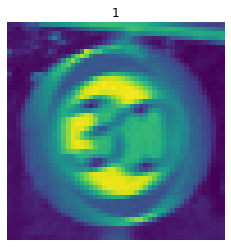

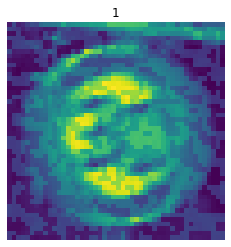

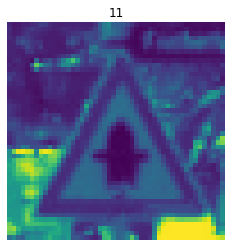

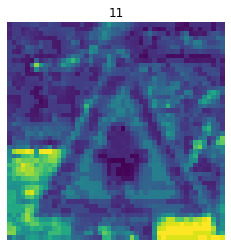

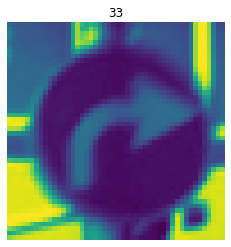

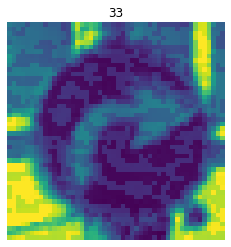

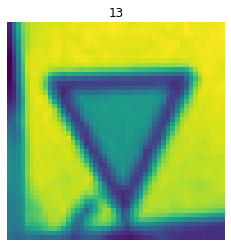

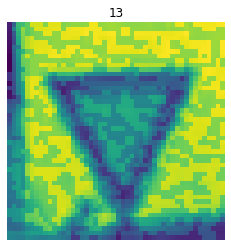

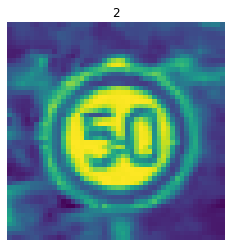

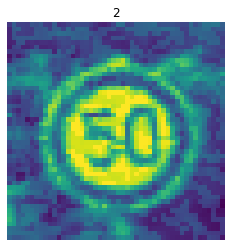

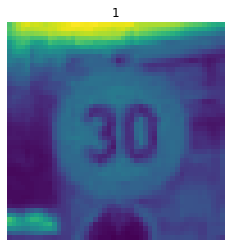

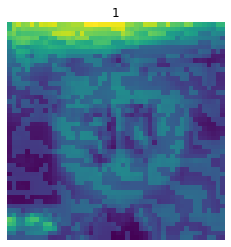

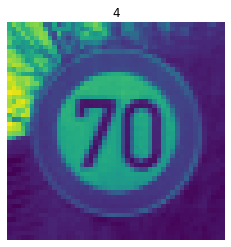

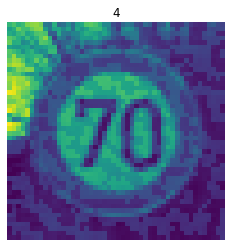

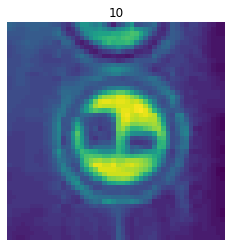

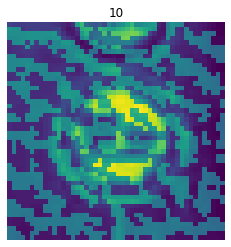

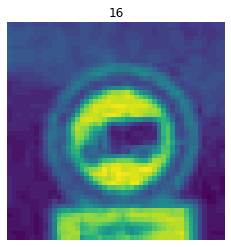

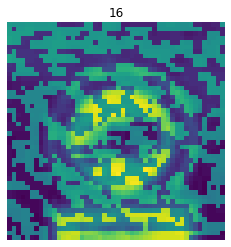

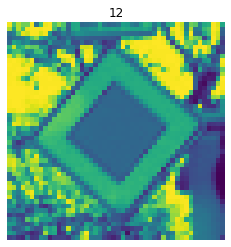

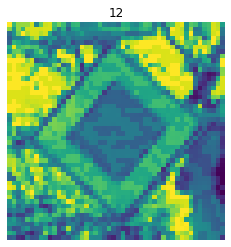

In [39]:
see_images= True
for i in range(10,20):
    if(see_images):
        see_x_image(x_test[idxs_fgsm_test[i]],y_test[idxs_fgsm_test[i]])
        see_x_image(numpy_raw_test_fgsm[i],labels_to_adv_onehot_test_fgsm[i])
        #see_x_image(numpy_raw_test_fgsm[0]-x_test[6128],labels_to_adv_onehot_test[0])

In [29]:
if (loading_fgsm):
    print("loading...")
    numpy_raw_train_fgsm = np.load("D:/data_adversarial_july/"+dataset+"/images_fgsm_train.npy")
    labels_to_adv_onehot_train_fgsm = np.load("D:/data_adversarial_july/"+dataset+"/labels_fgsm_train.npy")
    
    numpy_raw_test_fgsm = np.load("D:/data_adversarial_july/"+dataset+"/images_fgsm_test.npy")
    labels_to_adv_onehot_test_fgsm = np.load("D:/data_adversarial_july/"+dataset+"/labels_fgsm_test.npy")
    print("finished")

loading...
finished


In [84]:
if(not loading_fgsm):
    save_dir = "D:/data_adversarial_july/"+dataset+"/images_fgsm_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_train)

    save_dir = "D:/data_adversarial_july/"+dataset+"/labels_fgsm_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_train)

In [85]:
if (not loading_fgsm):
    save_dir = "D:/data_adversarial_july/"+dataset+"/images_fgsm_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, numpy_raw_test)

    save_dir = "D:/data_adversarial_july/"+dataset+"/labels_fgsm_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, labels_to_adv_onehot_test)

In [30]:
model.evaluate(numpy_raw_test_fgsm,labels_to_adv_onehot_test_fgsm)

41/41 [==============================] - 3s 73ms/step - loss: 4.6168 - accuracy: 0.1852


[4.616833209991455, 0.18515685200691223]

In [31]:
pwd

'C:\\Users\\fjdur\\Documents\\utils'

In [40]:
print(x_train.shape)
print(numpy_raw_train.shape)
x_train_and_adversary = np.concatenate((x_train,numpy_raw_train),axis=0)
print(x_train_and_adversary.shape)
x_train_and_adversary = np.concatenate((x_train_and_adversary,numpy_raw_train_bim),axis=0)
print(x_train_and_adversary.shape)
x_train_and_adversary = np.concatenate((x_train_and_adversary,numpy_raw_train_fgsm),axis=0)
print(x_train_and_adversary.shape)

print(y_train.shape)
print(labels_to_adv_onehot_train.shape)
y_train_and_adversary= np.concatenate((y_train,labels_to_adv_onehot_train),axis=0)
print(y_train_and_adversary.shape)
y_train_and_adversary= np.concatenate((y_train_and_adversary,labels_to_adv_onehot_train_bim),axis=0)
print(y_train_and_adversary.shape)
y_train_and_adversary= np.concatenate((y_train_and_adversary,labels_to_adv_onehot_train_fgsm),axis=0)
print(y_train_and_adversary.shape)


(31366, 48, 48, 1)
(1307, 48, 48, 1)
(32673, 48, 48, 1)
(33980, 48, 48, 1)
(35287, 48, 48, 1)
(31366, 43)
(1307, 43)
(32673, 43)
(33980, 43)
(35287, 43)


In [41]:
print(x_test.shape)
print(numpy_raw_test.shape)
x_test_and_adversary = np.concatenate((x_test,numpy_raw_test),axis=0)
print(x_test_and_adversary.shape)
x_test_and_adversary = np.concatenate((x_test_and_adversary,numpy_raw_test_bim),axis=0)
print(x_test_and_adversary.shape)
x_test_and_adversary = np.concatenate((x_test_and_adversary,numpy_raw_test_fgsm),axis=0)
print(x_test_and_adversary.shape)
#labels_to_adv_onehot_test

print(y_test.shape)
#print(labels_test_to_adv_oneshot.shape)
y_test_and_adversary= np.concatenate((y_test,labels_to_adv_onehot_test),axis=0)
print(y_test_and_adversary.shape)
y_test_and_adversary= np.concatenate((y_test_and_adversary,labels_to_adv_onehot_test_bim),axis=0)
print(y_test_and_adversary.shape)
y_test_and_adversary= np.concatenate((y_test_and_adversary,labels_to_adv_onehot_test_fgsm),axis=0)
print(y_test_and_adversary.shape)


(3923, 48, 48, 1)
(1307, 48, 48, 1)
(5230, 48, 48, 1)
(6537, 48, 48, 1)
(7844, 48, 48, 1)
(3923, 43)
(5230, 43)
(6537, 43)
(7844, 43)


In [42]:
model.evaluate(x_test_and_adversary,y_test_and_adversary)

246/246 [==============================] - 19s 76ms/step - loss: 0.8656 - accuracy: 0.8480


[0.8655991554260254, 0.8480367064476013]

In [43]:
dataset

'gtsrb'

In [44]:
save_dir = "D:/data_adversarial_july/"+dataset+"/train_and_adversary.npy"
with open(save_dir, 'wb') as f:
    np.save(f, x_train_and_adversary)

save_dir = "D:/data_adversarial_july/"+dataset+"/train_and_adversary_labels.npy"    
with open(save_dir, 'wb') as f:
    np.save(f, y_train_and_adversary)

In [45]:
save_dir = "D:/data_adversarial_july/"+dataset+"/test_and_adversary.npy"
with open(save_dir, 'wb') as f:
    np.save(f, x_test_and_adversary)

save_dir = "D:/data_adversarial_july/"+dataset+"/test_and_adversary_labels.npy"
with open(save_dir, 'wb') as f:
    np.save(f, y_test_and_adversary)